# Sales Analysis Project

Goals of the overall Project:
#1: Merge 12 months of CSV sales data files (from given downloaded dataset) into a SINGLE CSV file.1. 

Goals of this Notebook:
- Clean and explore the data. 
Goals of next notebooks:
- run analysis 
- create visualisations
- reach conclusions

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

#### Task #1: Merge 12 months of CSV sales data files (from given downloaded dataset) into a SINGLE CSV file.

In [4]:
os.getcwd()

'D:\\Datasets\\Pandas-Data-Science-Tasks-master'

#### Get data from CD and check first five lines of CSV file, checking the selected is the right file

In [5]:
df = pd.read_csv('.\SalesAnalysis\Sales_Data\Sales_April_2019.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### List all the files that we are trying to combine using os.listdir

In [6]:
files = [file for file in os.listdir('.\SalesAnalysis\Sales_Data')]

for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


#### How do concatenate CSV

We are trying to add each csv file to a previous csv, and store it in a new dataframe called all_months_data.
First create an empty data frame called all_months_data. Then for each file in the files read the data in the CSV file.
Second, now all_months_data will be changed becuase it will now be the combination of all previous files, and the next file in files. This is done using pd.concat

In [7]:
all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./SalesAnalysis/Sales_Data/" + file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


We can double check to make sure all data is concatinated in one file using .to_csv. This will create a new file called all_data.csv, and we choose not to inculde the index in when creating this file. This file can be found now in the working directory, and we can scroll to see the number of entries and if all the months of data are present. 

In [8]:
all_months_data.to_csv("all_data.csv", index=False)

#### Create a quick read of updated dataframe

In [9]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Get rid of the NaN values
Create a df of all the rows with NaN values. We see that these rows have no data, not just a missing column, so lets drop them from our all_data df using dropna syntax. Conditions how=all means that we are droping rows where nan is in all the columns. 

In [10]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head(10)

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Augment data with additional columns for DA

### Task 2: Add a Month Column

In [11]:
all_data['Month'] = 3
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",3
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",3
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",3
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",3
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",3


This adds a month column with the input as three. Lets be more percise and match it to the month of the order date, and change it to a int

In [12]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int')
all_data.head()

ValueError: invalid literal for int() with base 10: 'Or'

Error stating that instead of the month coming back from the order date we are getting a str that starts with 'or'. We can find the values of 'or', create a df called or_df and then changeour all_data df to no include the or_df

In [13]:
or_df = all_data[all_data['Order Date'].str[0:2] == 'Or']
or_df.head()



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


Cool now we can make all_data != to 'or'. We can check to see if it worked by running the code that gave an error again. 

In [14]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']


In [15]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


COOL NO ERRORS!

#### Question 1: What was the best month for sales? How much was earned that month?

Add a sales column

In [16]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

TypeError: can't multiply sequence by non-int of type 'str'

Another Error. This is what DS is huh? Looks like the price is encoded in excel chart as letters/str. We could change it in excel, but lets change the type in python instead. 

In [17]:
print(all_data.dtypes)

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int32
dtype: object


##### Convert Data to correct type

In [18]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(int)
all_data['Price Each'] = all_data['Price Each'].astype(float)
print(all_data.dtypes)

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object


Lets try it again

In [19]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [20]:
all_data.groupby('Month').sum().sort_values(by='Sales')

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
9,13109,2.084992e+06,2.097560e+06
2,13449,2.188885e+06,2.202022e+06
8,13448,2.230345e+06,2.244468e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
3,17005,2.791208e+06,2.807100e+06
5,18667,3.135125e+06,3.152607e+06
11,19798,3.180601e+06,3.199603e+06


Lets plot this 


Bad key "text.kerning_factor" on line 4 in
D:\ProgramData\Anaconda3\envs\SalesDataYoutube\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


<function matplotlib.pyplot.show(*args, **kw)>

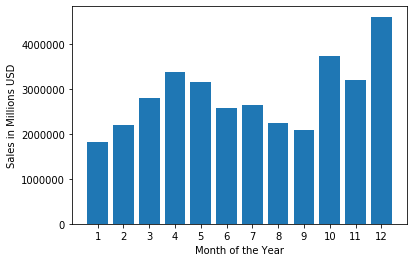

In [21]:
import matplotlib.pyplot as plt

results = all_data.groupby('Month').sum()
months = range(1,13)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in Millions USD')
plt.xlabel('Month of the Year')
plt.show

Nice Graph. From here we can make some small assuptions, and try to explain some of the results from the data. 

#### Question 2: Which city had the highest number of sales?

#### Add a city column

In [22]:
all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1] + '' + x.split(',')[2][:3])

all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [23]:
all_data.groupby('City').sum().sort_values(by='Sales')

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Portland ME,2750,4.471893e+05,17144,4.497583e+05
Austin TX,11153,1.809874e+06,69829,1.819582e+06
Portland OR,11303,1.860558e+06,70621,1.870732e+06
Seattle WA,16553,2.733296e+06,104941,2.747755e+06
Dallas TX,16730,2.752628e+06,104620,2.767975e+06
Atlanta GA,16602,2.779908e+06,104794,2.795499e+06
Boston MA,22528,3.637410e+06,141112,3.661642e+06
New York City NY,27932,4.635371e+06,175741,4.664317e+06
Los Angeles CA,33289,5.421435e+06,208325,5.452571e+06


<function matplotlib.pyplot.show(*args, **kw)>

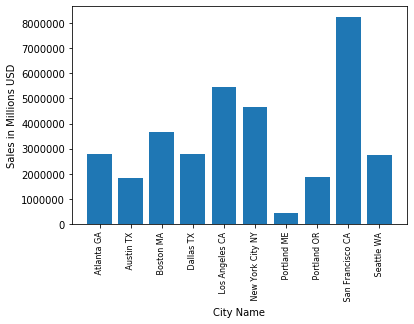

In [24]:
results = all_data.groupby('City').sum()

cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in Millions USD')
plt.xlabel('City Name')
plt.show

#### Question 3: What time should we display advertisements to maximize likelihoood of customer's buying product?

 
###### Ideally we add an hour column to see what time of the day people are making orders

In [31]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
#This changes the format of the Order Date column, making it easier to read and grab collect information.  

all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
#These two lines add the Hour and Minute columns.

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


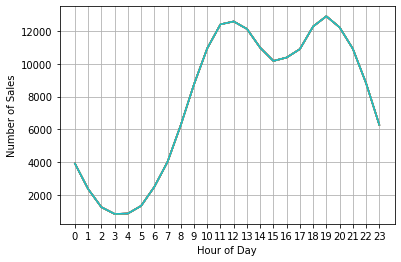

In [38]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Sales')
plt.grid()
 

# These results show that most orders are made around 11am-Noon and around 7PM. 

#### Question 4: What products are mist often sold together?

In [50]:
# First thing we are looking for are Products with matching order IDs. 
# These are products that are sold in a package, like a phone and headphones, or an electronic and batteries.


df = all_data[all_data['Order ID'].duplicated(keep=False)]
# This creates new data frame(df) that checks all cells in the Order ID column and gets rid of the duplicate entries. 

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
# Created a new colum (Grouped). Grouping two cities together 

df = df[['Order ID' , 'Grouped']].drop_duplicates()



df.head()

D:\ProgramData\Anaconda3\envs\SalesDataYoutube\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [55]:
#Now we need to count the pairs in the grouped column
from itertools import combinations
from collections import Counter 

count = Counter() # define count

for row in df['Grouped']:
    row_list = row.split(',') # This is going to split the rows in the Grouped Column by a ','
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)






('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Question 5: What product sold the most and why?

In [57]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


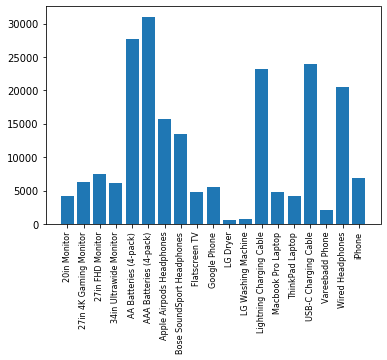

In [66]:
product_group = all_data.groupby('Product')

quantity_ordered = product_group.sum()['Quantity Ordered']

products = [ product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.xticks(products, rotation = 'vertical', size=8)
plt.show()



Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


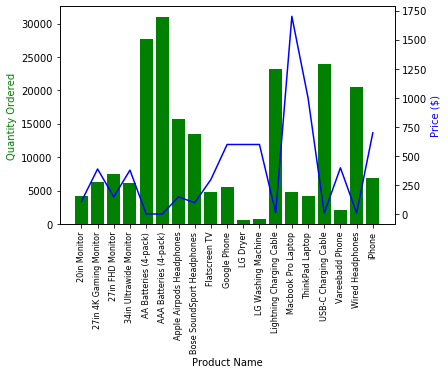

In [78]:
prices = all_data.groupby('Product').mean()['Price Each']
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered' , color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

print(prices)